# Coloring random graphs
In this project, we wish to estimate the number of $J$-colorings of a given graph of size $K$. For this, we will define a graph using the `networkx` package. Then, we will write an algorithm that verifies if a coloring is valid. Finally, we will estimate the number of colorings using a Monte-Carlo method.

We start with some useful imports:

In [1]:
# For mybinder, uncomment
!pip install numpy matplotlib ipywidgets networkx

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
% matplotlib inline 
% matplotlib notebook
import networkx as nx
import ipywidgets as widgets

Defining a graph can be extremely simple, as `networkx` has a large list of graph generators. We will use as example the Petersen graph.

In [2]:
G = nx.petersen_graph()

<IPython.core.display.Javascript object>


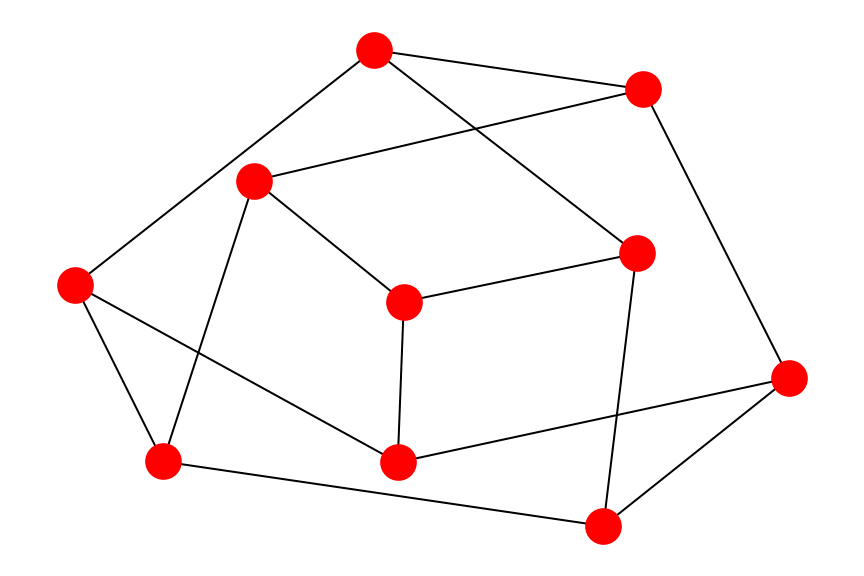

In [3]:
plt.figure()
nx.draw(G)

In [4]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [5]:
G.edges()

EdgeView([(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (2, 3), (2, 7), (3, 8), (3, 4), (4, 9), (5, 8), (5, 7), (6, 8), (6, 9), (7, 9)])

## Coloring a graph
We will denote a coloring using a dict of integers, where each integer corresponds to a color, such that `d[i] = j` means node $i$ is colored with color $j$.

In [6]:
def random_coloring(graph,n_colors):
    coloring = {}
    for node in graph.nodes():
        coloring[node] = np.random.randint(0,n_colors)
    return coloring

In [7]:
some_coloring = random_coloring(G,5)
some_coloring

{0: 1, 1: 0, 2: 2, 3: 3, 4: 1, 5: 2, 6: 0, 7: 4, 8: 1, 9: 3}

We can draw the coloring

In [8]:
def draw_coloring(G,coloring,colors):
    fig = plt.figure()
    n_colors = len(colors)

    pos = nx.spring_layout(G)
    for i in range(n_colors):
        nx.draw_networkx_nodes(G,pos,[x for x in G.nodes() if coloring[x]==i],width=8,node_color=colors[i])
    nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
        
    plt.axis('off')
    plt.show() 
    return fig

In [9]:
some_colors = ['red','blue','green','yellow','purple']

<IPython.core.display.Javascript object>


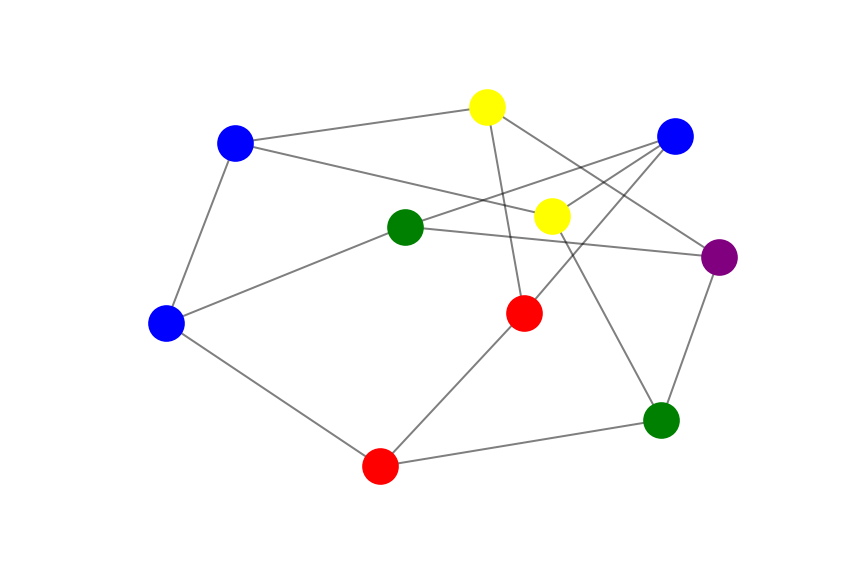

In [10]:
fig2 = draw_coloring(G,some_coloring,some_colors)

To verify if a graph is correctly colored is to verify if each edge connects nodes with different colors. We see that the coloring provided above does not work.

In [11]:
def valid_coloring(graph,coloring):
    return not any([coloring[x]==coloring[y] for (x,y) in graph.edges()])

In [12]:
valid_coloring(G,some_coloring)

False

If the above says 'True', you are lucky! Try with some other random colorings to see if the result changes.

## Estimating the number of colorings

In [13]:
def mc_number_colorings(graph,n_colors,M=1000):
    results = []
    for j in range(M):
        coloring = random_coloring(graph,n_colors)
        results += [1.*valid_coloring(graph,coloring)]
    count = np.cumsum(results)/np.arange(1,M+1)*(len(graph.nodes())**n_colors)
    return count

In [14]:
estimate = mc_number_colorings(G,10,M=int(1e3))
estimate[-1]

2060000000.0

<IPython.core.display.Javascript object>


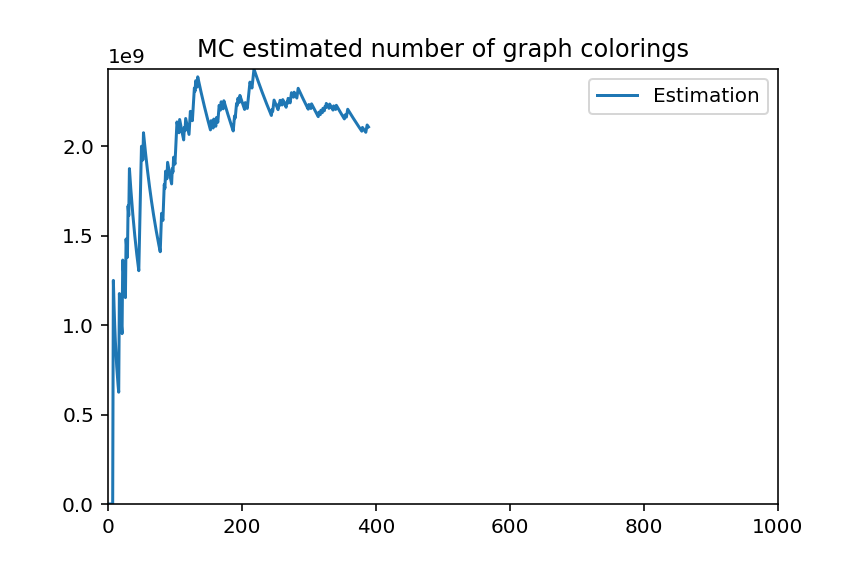

In [15]:
def start_plot(estimate,maxM):
    to_plot = estimate[:maxM]
    lim = np.max(to_plot)
    fig = plt.figure()
    plt.xlim((0,maxM))
    plt.ylim((0,lim))
    plt.plot([],[],label='Estimation')
    plt.legend(loc='upper right')
    plt.title('MC estimated number of graph colorings')
    plt.show()
    return fig

fig3 = start_plot(estimate,1000)

def update_plot(estimate,M,figure):
    to_plot = estimate[:M]
    plt.figure(figure.number)
    l, = figure.axes[0].lines
    l.set_xdata(np.arange(1,M+1))
    l.set_ydata(to_plot)
    
def update_length(value):
    update_plot(estimate=estimate,M=value['new'],figure = fig3)
    
slider = widgets.IntSlider(min=0,max=1000,step=1,value=0)
slider.observe(update_length,names='value')
display(slider)